# Palleja & Suez Significant mOTUs baseline random forest permutation
## Using vegdist (Bray-Curtis). Both studies from NGless result and rarefied to 190!

## 1. Read in data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

/Users/Jessica/anaconda3/lib/python3.7/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
genus = pd.read_csv('/Users/Jessica/Documents/Lab/Multiple_longitudinal/Microbe_resilience/Palleja_Suez_significant_mOTU_baseline_vegdist_bray_forML.txt',
                   delimiter = "\t")

In [3]:
genus.head()

,Study,ID,Dist_V1V2,Timepoint,Run,Bacteroides.coprophilus..ref_mOTU_v25_04094.,Bacteroides.dorei.vulgatus..ref_mOTU_v25_02367.,Bacteroides.faecis.thetaiotaomicron..ref_mOTU_v25_01657.,Bacteroides.massiliensis..ref_mOTU_v25_02135.,Bacteroides.rodentium.uniformis..ref_mOTU_v25_00855.,...,Faecalibacterium.prausnitzii..ref_mOTU_v25_06108.,Faecalibacterium.prausnitzii..ref_mOTU_v25_06109.,Faecalibacterium.prausnitzii..ref_mOTU_v25_06110.,Faecalibacterium.prausnitzii..ref_mOTU_v25_06112.,Faecalibacterium.sp...ref_mOTU_v25_03636.,Faecalibacterium.species.incertae.sedis..meta_mOTU_v25_12303.,Faecalibacterium.species.incertae.sedis..meta_mOTU_v25_12325.,Faecalibacterium.species.incertae.sedis..meta_mOTU_v25_12376.,Faecalibacterium.species.incertae.sedis..meta_mOTU_v25_12403.,Eggerthellaceae.species.incertae.sedis..meta_mOTU_v25_13204.
0,Suez,603,0.547619,Baseline,ERR2749744,0,4,0,0,1,...,0,5,2,4,1,0,0,0,0,0
1,Suez,604,0.760218,Baseline,ERR2749783,0,0,0,0,0,...,1,1,0,1,0,0,1,0,0,0
2,Suez,605,0.883333,Baseline,ERR2749816,0,0,0,0,0,...,3,0,1,0,0,0,0,0,0,0
3,Suez,606,0.989071,Baseline,ERR2749856,4,6,0,4,0,...,3,4,0,0,0,0,0,0,0,0
4,Suez,704,0.968379,Baseline,ERR2750073,0,1,1,0,0,...,5,2,1,1,0,1,1,1,1,0


## 2. Set up evaluation environment. Use stratified 5-fold CV

In [4]:
my_data = genus.drop(columns=['Timepoint', 'Study', "Run"])

In [5]:
my_data.head()

,ID,Dist_V1V2,Bacteroides.coprophilus..ref_mOTU_v25_04094.,Bacteroides.dorei.vulgatus..ref_mOTU_v25_02367.,Bacteroides.faecis.thetaiotaomicron..ref_mOTU_v25_01657.,Bacteroides.massiliensis..ref_mOTU_v25_02135.,Bacteroides.rodentium.uniformis..ref_mOTU_v25_00855.,Bacteroides.sp...ref_mOTU_v25_03475.,Bacteroides.stercoris..ref_mOTU_v25_01579.,Bifidobacterium.adolescentis..ref_mOTU_v25_02703.,Faecalibacterium.prausnitzii..ref_mOTU_v25_06108.,Faecalibacterium.prausnitzii..ref_mOTU_v25_06109.,Faecalibacterium.prausnitzii..ref_mOTU_v25_06110.,Faecalibacterium.prausnitzii..ref_mOTU_v25_06112.,Faecalibacterium.sp...ref_mOTU_v25_03636.,Faecalibacterium.species.incertae.sedis..meta_mOTU_v25_12303.,Faecalibacterium.species.incertae.sedis..meta_mOTU_v25_12325.,Faecalibacterium.species.incertae.sedis..meta_mOTU_v25_12376.,Faecalibacterium.species.incertae.sedis..meta_mOTU_v25_12403.,Eggerthellaceae.species.incertae.sedis..meta_mOTU_v25_13204.
0,603,0.547619,0,4,0,0,1,0,0,0,0,5,2,4,1,0,0,0,0,0
1,604,0.760218,0,0,0,0,0,0,0,0,1,1,0,1,0,0,1,0,0,0
2,605,0.883333,0,0,0,0,0,0,0,2,3,0,1,0,0,0,0,0,0,0
3,606,0.989071,4,6,0,4,0,0,1,0,3,4,0,0,0,0,0,0,0,0
4,704,0.968379,0,1,1,0,0,0,0,2,5,2,1,1,0,1,1,1,1,0


In [6]:
from sklearn.model_selection import StratifiedKFold
skf = StratifiedKFold(n_splits=5)

## Step 3: Try out Random Forest (within the 5 - Fold CV setup)

In [7]:
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt
from collections import OrderedDict

In [8]:
seed = 42

In [9]:
X, y = my_data.drop(columns=['ID','Dist_V1V2']), my_data.Dist_V1V2

In [10]:
X.head()

,Bacteroides.coprophilus..ref_mOTU_v25_04094.,Bacteroides.dorei.vulgatus..ref_mOTU_v25_02367.,Bacteroides.faecis.thetaiotaomicron..ref_mOTU_v25_01657.,Bacteroides.massiliensis..ref_mOTU_v25_02135.,Bacteroides.rodentium.uniformis..ref_mOTU_v25_00855.,Bacteroides.sp...ref_mOTU_v25_03475.,Bacteroides.stercoris..ref_mOTU_v25_01579.,Bifidobacterium.adolescentis..ref_mOTU_v25_02703.,Faecalibacterium.prausnitzii..ref_mOTU_v25_06108.,Faecalibacterium.prausnitzii..ref_mOTU_v25_06109.,Faecalibacterium.prausnitzii..ref_mOTU_v25_06110.,Faecalibacterium.prausnitzii..ref_mOTU_v25_06112.,Faecalibacterium.sp...ref_mOTU_v25_03636.,Faecalibacterium.species.incertae.sedis..meta_mOTU_v25_12303.,Faecalibacterium.species.incertae.sedis..meta_mOTU_v25_12325.,Faecalibacterium.species.incertae.sedis..meta_mOTU_v25_12376.,Faecalibacterium.species.incertae.sedis..meta_mOTU_v25_12403.,Eggerthellaceae.species.incertae.sedis..meta_mOTU_v25_13204.
0,0,4,0,0,1,0,0,0,0,5,2,4,1,0,0,0,0,0
1,0,0,0,0,0,0,0,0,1,1,0,1,0,0,1,0,0,0
2,0,0,0,0,0,0,0,2,3,0,1,0,0,0,0,0,0,0
3,4,6,0,4,0,0,1,0,3,4,0,0,0,0,0,0,0,0
4,0,1,1,0,0,0,0,2,5,2,1,1,0,1,1,1,1,0


In [11]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_validate
import random
import math
seed = 42
X, y = my_data.drop(columns=['ID','Dist_V1V2']), my_data.Dist_V1V2
kf = KFold(n_splits=5)

In [12]:
# Max_depth = 5, max_features = "log2"
RF_1 = RandomForestRegressor(random_state=seed, max_depth=5, n_estimators= 1100, 
                            oob_score=True, max_features = "log2")
result_negMSE_1 = cross_val_score(RF_1, X, y, cv = kf, scoring="neg_mean_absolute_error")
print("Avg kfold neg MSE: {}".format(result_negMSE_1.mean())) #Print average negMSE

Avg kfold neg MSE: -0.138750935182069


**The random forest negMSE = -0.138750935182069**

## Step 4: Permutation
**First shuffle Dist_V1V2 against other columns, and then do random forest. Repeat this 500 times**

In [13]:
# Try out how to code in the permutation step

#First copy my_data using pandas.DataFrame.copy (the correct way to do this!)
#https://moonbooks.org/Articles/How-to-copy-a-dataframe-with-pandas-in-python-/
#shuffled_data = my_data.copy()

# Shuffle
#i=24
#shuffled_data['Dist_V1V2'] = shuffled_data['Dist_V1V2'].sample(frac=1, random_state=i).reset_index(drop=True)
#shuffled_data.head(5)

In [14]:
#X_shuffle, y_shuffle = shuffled_data.drop(columns=['ID','Dist_V1V2']), shuffled_data.Dist_V1V2
#X_shuffle.head(5)

In [15]:
#y_shuffle.head(5)

In [16]:
# Code not used

#Create an empty ordereddict first
#permutation_negMSE = OrderedDict((i, []) for i in range(1, 3+1))
#permutation_negMSE[i].append((negMSE))

In [13]:
# Permutation
from collections import OrderedDict

seed=42
kf = KFold(n_splits=5)
# Max_depth = 2, max_features = "sqrt" n_estimators=1100, the same setting as the one above
RF_shuffle = RandomForestRegressor(random_state=seed, max_depth=2, n_estimators= 1100, 
                            oob_score=False, max_features = "sqrt")

permu_times = 1000

#Create an empty array first
#https://stackoverflow.com/questions/568962/how-do-i-create-an-empty-array-matrix-in-numpy
permutation_negMSE=a = np.empty(shape=(permu_times,1))

for i in range(1, permu_times + 1):
        #First copy my_data using pandas.DataFrame.copy (the correct way to do this!)
        #https://moonbooks.org/Articles/How-to-copy-a-dataframe-with-pandas-in-python-/
        shuffled_data = my_data.copy()

        #Then shuffle data
        shuffled_data['Dist_V1V2'] = shuffled_data['Dist_V1V2'].sample(frac=1, random_state=i).reset_index(drop=True)
        
        #Then run random forest
        X_shuffle, y_shuffle = shuffled_data.drop(columns=['ID','Dist_V1V2']), shuffled_data.Dist_V1V2
        result_negMSE_shuffle = cross_val_score(RF_shuffle, X_shuffle, y_shuffle, cv = kf, scoring="neg_mean_absolute_error")
        
        # Record the neg MSE for each permutation
        negMSE=result_negMSE_shuffle.mean() #Print average negMSE
        permutation_negMSE[i-1]=negMSE

In [14]:
len(permutation_negMSE)

1000

Text(0.5, 1.0, 'Permutation negative MSE histogram')

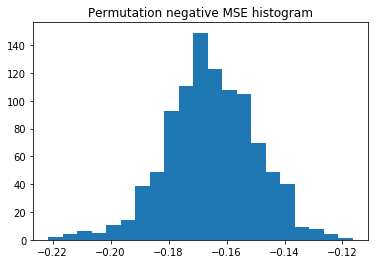

In [15]:
# Plot a histogram
binwidth=0.005
plt.hist(permutation_negMSE, bins=np.arange(min(permutation_negMSE), max(permutation_negMSE) 
                                            + binwidth, binwidth))
plt.title("Permutation negative MSE histogram") 

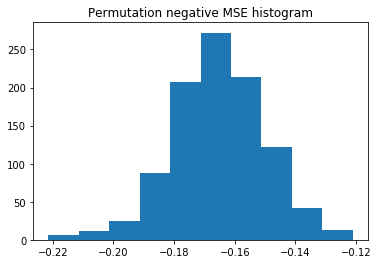

In [16]:
# Calculate area under histogram to get (some sort of) p value
values, bins, _ = plt.hist(permutation_negMSE)
plt.title("Permutation negative MSE histogram") 
area = sum(np.diff(bins)*values)

In [17]:
# What is the p = 0.05 threshold?
np.percentile(permutation_negMSE, 95)

-0.1407328182969024